# Notes: [Phase plane analysis](https://neuronaldynamics.epfl.ch/online/Ch4.S3.html)

## Stability of Fixed Points

>$$\frac{\mathrm{d}x}{\mathrm{d}t}=f(x,y)$$
>
>$$\frac{\mathrm{d}y}{\mathrm{d}t}=f(x,y)$$
>
>**[Definition of nullcline](https://mcb.berkeley.edu/courses/mcb137/exercises/Nullclines.pdf)**. The $x$-nullcline is a set of points in the phase plane so that $\frac{\mathrm{d}x}{\mathrm{d}t} = 0$.
>
>Geometrically, these are the points where the vectors are either straight up or straight down. Algebraically, we find the $x$-nullcline by solving $f(x,y) = 0$.

The local stability of a fixed point $(u_{FP},w_{FP})$ is determined by linearization of the dynamics at the intersection. With $x=(u−u_{FP},w−w_{FP})^T$, we have after the linearization

$$\frac{\mathrm{d}}{\mathrm{d}t}x=
\left(\begin{matrix} 
F_u & F_w \\
G_u & G_w 
\end{matrix}\right)
x$$

where $F_u=\partial F/\partial u$, $F_w=\partial F/\partial w$,..., are evaluated at the fixed point. 


The ***necessary and sufficient condition*** for **stability** is therefore

$$F_u+G_w<0\text{ and }F_u G_w-F_w G_u>0$$

If $F_u G_w-F_w G_u<0$, then the imaginary part of both eigenvalues vanishes. One of the eigenvalues is positive, the other one negative. The fixed point is then called a **saddle point**.


In dimensionless variables the **FitzHugh-Nagumo model** is

$$\frac{\mathrm{d}u}{\mathrm{d}t}=u-\frac{1}{3}u^3-w+I$$
$$\frac{\mathrm{d}w}{\mathrm{d}t}=\epsilon(b_0+b_1 u-w)$$

Time is measured in units of $\tau$ and $\epsilon=\tau/\tau_w $is the ratio of the two time scales. The u-nullcline is $w=u-u^3/3+I$ with maxima at $u=\pm 1$. 

# Codes: [FitzHugh-Nagumo: Phase plane and bifurcation analysis](https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/phase-plane-analysis.html)

fixed_point: (-1.0000000000000002, -4.440892098500626e-16)


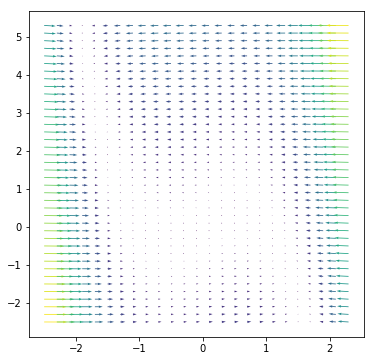

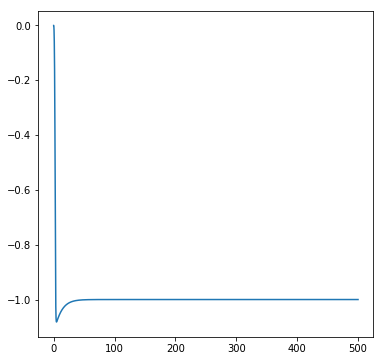

In [1]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.phase_plane_analysis import fitzhugh_nagumo
plt.rcParams['figure.figsize']=[6,6]
fitzhugh_nagumo.plot_flow()

fixed_point = fitzhugh_nagumo.get_fixed_point()
print("fixed_point: {}".format(fixed_point))

plt.figure()
trajectory = fitzhugh_nagumo.get_trajectory()
plt.plot(trajectory[0], trajectory[1])

## Exercise: Phase plane analysis

(-2.5, 2.5)

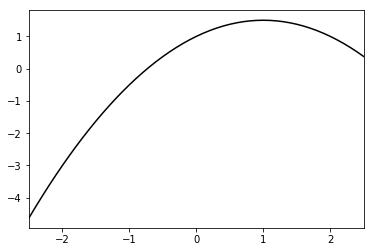

In [2]:
x = np.arange(-2.5, 2.51, .1)  # create an array of x values
y = -x**2 / 2. + x + 1  # calculate the function values for the given x values
plt.plot(x, y, color='black')  # plot y as a function of x
plt.xlim(-2.5, 2.5)  # constrain the x limits of the plot

### Question

$$\begin{cases}
\frac{\mathrm{d}{u}}{\mathrm{d}{t}}=u(1-u^2)-w+I\equiv F(u,w)\\
\frac{\mathrm{d}{w}}{\mathrm{d}{t}}=\epsilon(u-0.5 w+1)\equiv \epsilon G(u,w)
\end{cases}$$

$I=0,\epsilon=0.1$

In [3]:
fitzhugh_nagumo.plot_flow?

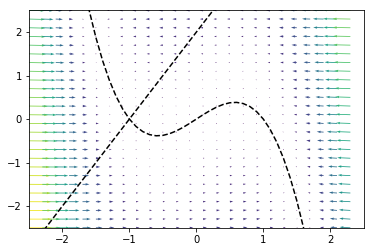

In [4]:
I=0
u=np.arange(-2.5, 2.51, .1)
w=u*(1-u**2)+I
plt.plot(u, w,'--',color='black')  # plot y as a function of x

u=np.arange(-2.5, 2.51, .1)
w=2*(u+1)
plt.plot(u, w,'--',color='black')  # plot y as a function of x
plt.xlim(-2.5, 2.5)  # constrain the x limits of the plot
plt.ylim(-2.5,2.5)
fitzhugh_nagumo.plot_flow(I=I,eps=0.1,a=2)

### Question

In [5]:
fitzhugh_nagumo.get_trajectory?

(-2.5, 2.5)

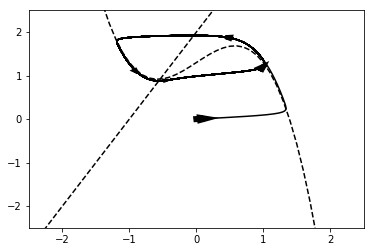

In [7]:
I=1.3
t,u,w=fitzhugh_nagumo.get_trajectory(v0=0,w0=0,I=I)

#plot the trajectory
d=int(len(u)/3)
line=plt.plot(u, w, color='black')[0]  # plot y as a function of x
plt.arrow(u[0],w[0],u[0+1]-u[0],w[0+1]-w[0],
         shape='full', lw=6, length_includes_head=True, head_width=.05)
plt.arrow(u[d//2],w[d//2],u[d//2+1]-u[d//2],w[d//2+1]-w[d//2],
         shape='full', lw=5, length_includes_head=True, head_width=.05)
plt.arrow(u[d],w[d],u[d+1]-u[d],w[d+1]-w[d],
         shape='full', lw=4, length_includes_head=True, head_width=.05)
plt.arrow(u[2*d],w[2*d],u[2*d+1]-u[2*d],w[2*d+1]-w[2*d],
         shape='full', lw=3, length_includes_head=True, head_width=.05)
plt.arrow(u[-2],w[-2],u[-2+1]-u[-2],w[-2+1]-w[-2],
         shape='full', lw=2, length_includes_head=True, head_width=.05)
plt.xlim(-2.5, 2.5)  # constrain the x limits of the plot
plt.ylim(-2.5, 2.5)  # constrain the x limits of the plot

#plot the nullcline
u=np.arange(-2.5, 2.51, .1)
w=u*(1-u**2)+I
plt.plot(u, w,'--',color='black')  # plot y as a function of x
u=np.arange(-2.5, 2.51, .1)
w=2*(u+1)
plt.plot(u, w,'--',color='black')  # plot y as a function of x
plt.xlim(-2.5, 2.5)  # constrain the x limits of the plot
plt.ylim(-2.5,2.5)


### Question

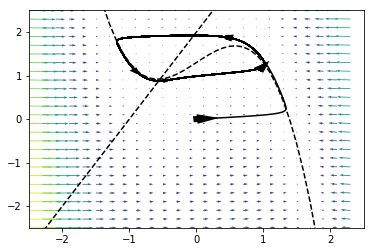

In [8]:
I=1.3
t,u,w=fitzhugh_nagumo.get_trajectory(v0=0,w0=0,I=1.3)
plt.plot(u, w, color='black')  # plot y as a function of x

#plot the trajectory
d=int(len(u)/3)
plt.arrow(u[0],w[0],u[0+1]-u[0],w[0+1]-w[0],
         shape='full', lw=6, length_includes_head=True, head_width=.05)
plt.arrow(u[d//2],w[d//2],u[d//2+1]-u[d//2],w[d//2+1]-w[d//2],
         shape='full', lw=5, length_includes_head=True, head_width=.05)
plt.arrow(u[d],w[d],u[d+1]-u[d],w[d+1]-w[d],
         shape='full', lw=4, length_includes_head=True, head_width=.05)
plt.arrow(u[2*d],w[2*d],u[2*d+1]-u[2*d],w[2*d+1]-w[2*d],
         shape='full', lw=3, length_includes_head=True, head_width=.05)
plt.arrow(u[-2],w[-2],u[-2+1]-u[-2],w[-2+1]-w[-2],
         shape='full', lw=2, length_includes_head=True, head_width=.05)
plt.xlim(-2.5, 2.5)  # constrain the x limits of the plot
plt.ylim(-2.5, 2.5)  # constrain the x limits of the plot

#plot the nullcline
u=np.arange(-2.5, 2.51, .1)
w=u*(1-u**2)+I
plt.plot(u, w,'--',color='black')  # plot y as a function of x
u=np.arange(-2.5, 2.51, .1)
w=2*(u+1)
plt.plot(u, w,'--',color='black')  # plot y as a function of x
plt.xlim(-2.5, 2.5)  # constrain the x limits of the plot
plt.ylim(-2.5,2.5)

fitzhugh_nagumo.plot_flow(I=I,eps=0.1,a=2)

### Question

In [60]:
# therotical way
import sympy as sp
from sympy.matrices import Matrix
F,G=sp.symbols('F G',cls=sp.Function)
u,w,I=sp.symbols('u w I')
F=u*(1-u**2)-w+I
G=u-0.5*w+1
M=Matrix([F,G]).jacobian(Matrix([u,w]))

In [15]:
%pfile fitzhugh_nagumo.get_fixed_point

fixed_point: (-0.6823278038280195, 0.635344392343961)
fixed_point: (0.0, 2.0)
fixed_point: (0.6823278038280195, 3.364655607656039)
fixed_point: (1.0000000000000002, 4.0)
fixed_point: (1.2134116627622296, 4.42682332552446)


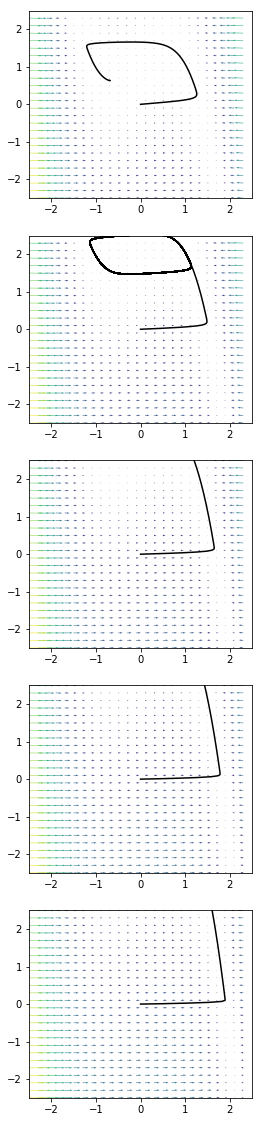

In [93]:
%matplotlib inline
def mine_fitzhugh_nagumo_plot_flow(I,ax,eps=0.1):
    # define the interval spanned by voltage v and recovery variable w
    # to produce the phase plane
    uu = np.arange(-2.5, 2.5, 0.2)
    ww = np.arange(-2.5, 5.5, 0.2)
    (UU, WW) = np.meshgrid(uu, ww)
    # Compute derivative of v and w according to FHN equations
    # and velocity as vector norm
    dV = UU * (1.-(UU**2)) - WW + I
    dW = eps * (UU-0.5*WW+1)
    vel = np.sqrt(dV**2 + dW**2)
    # Use quiver function to plot the phase plane
    ax.quiver(UU, WW, dV, dW, vel)

import matplotlib.animation as animation
fig=plt.figure(figsize=(4,20))
ax=[fig.add_subplot(5,1,i)for i in range(1,6)]
for i in range(5):
    I=0+(i+1)*(5-0)/5
    t,u,w=fitzhugh_nagumo.get_trajectory(v0=0,w0=0,I=I)
    fixed_point = fitzhugh_nagumo.get_fixed_point(I=I)
    print("fixed_point: {}".format(fixed_point))

    ax[i].plot(u, w, color='black')  # plot y as a function of x
    ax[i].set_xlim(-2.5,2.5)
    ax[i].set_ylim(-2.5,2.5)
    mine_fitzhugh_nagumo_plot_flow(I=I,ax=ax[i],eps=0.1)

## Exercise: Jacobian & Eigenvalues

### Question

In [21]:
def get_jacobian(u_0,w_0):
    return [[1-3*u_0**2,-1],[0.1,-0.05]]

### Question

In [22]:
u0,w0=fitzhugh_nagumo.get_fixed_point(I=0,eps=0.1)
J=get_jacobian(u0,w0)

### Question

In [23]:
np.linalg.eigvals(J)

array([-1.94729334, -0.10270666])

## Exercise: Bifurcation analysis

In [30]:
import numpy as np
list1 = []
list2 = []
currents = np.arange(0,4,.1) # the I values to use
for I in currents:
    e=np.linalg.eigvals(
        get_jacobian(
            *fitzhugh_nagumo.get_fixed_point(I=I)
    ))
    list1.append(e[0].real) # store each value in a separate list
    list2.append(e[1].real)

# your code to plot list1 and list 2 against I goes here

### Question

In [48]:
#1.3 to 2.7
currents[np.where(np.array(list1)>0)]

array([1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7])

In [47]:
currents[np.where(np.array(list2)>0)]

array([1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7])

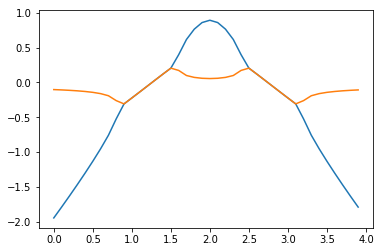

In [37]:
plt.figure()
plt.plot(currents,list1)
plt.plot(currents,list2)
plt.show()

# Extra: Solution of Fitzhugh Nagumo model

In [39]:
I,t,epi=sp.symbols('I t epsilon')
u,w=sp.symbols('u w',cls=sp.Function)

In [20]:
eq=(
    sp.Eq(sp.Derivative(u(t),t),u(t)*(1-u(t)**2)-w(t)+I).subs(I,0),
    sp.Eq(sp.Derivative(w(t),t),epi*(u(t)-0.5*w(t)+1)).subs(epi,0.1),
)
sp.dsolve(eq)

[Eq(u(t), -C1*exp(0.894076365356005*t) - C2*exp(0.0559236346439947*t) - 2.0),
 Eq(w(t), -0.105923634643995*C1*exp(0.894076365356005*t) - 0.944076365356005*C2*exp(0.0559236346439947*t) - 2.0)]